In [34]:
%matplotlib inline

from matplotlib.pyplot import subplots
import richardsplot as rplot

from utilities.analysis import pixellc, plotting, smoothing
from utilities.ccd import CCD
from utilities.containers import *
from utilities.conversions import *

In [35]:
ccd = CCD(campaign=8, channel=2, module=6, field='FLUX')
#cont = PixelMapContainer(ccd).save('data/K2PixelMap.hdf5')
cont = PixelMapContainer.from_hdf5('data/K2PixelMap.hdf5', ccd)
gen = PixMapGenerator(cont)

cmap = rplot.palettable.colorbrewer.diverging.PuOr_11.mpl_colormap

In [43]:
percentiles = np.linspace(0,100,501)
lc = pixellc.get_pixel_lc(gen, percentiles, flux_range=map(magToFlux, (50,1)))

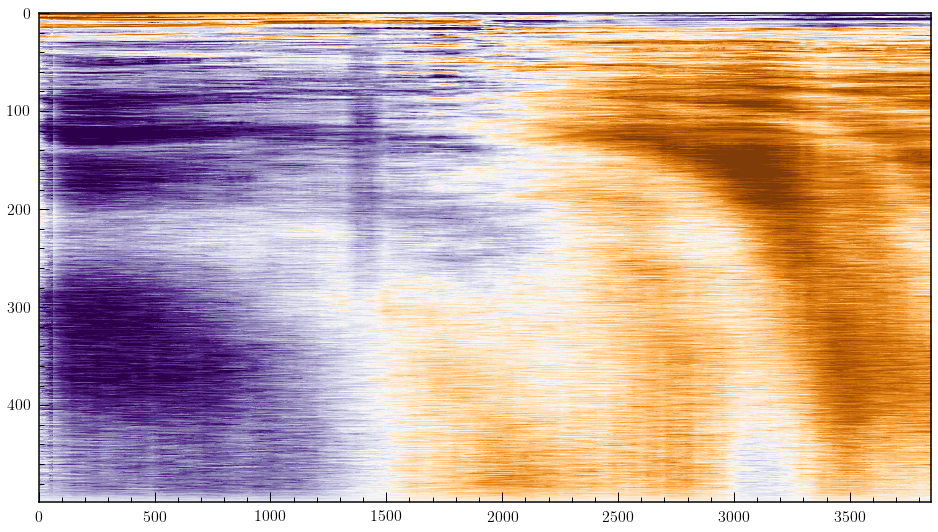

In [44]:
lc[:,:,2].shape
fig, ax = subplots(1,1, figsize=(16,9))
cmap = rplot.palettable.colorbrewer.diverging.PuOr_11.mpl_colormap
w = lc[:,1:,2] - lc[:,:-1,2]
w[::] -= np.nanmedian(w, axis=0)
w[::] /= np.nanstd(w, axis=0)
w = smoothing.running_median(w, 120, axis=0)
ax.imshow(w.T[::-1], aspect='auto', vmin=-1, vmax=1, cmap=cmap)


[-1.19454765e+01 -6.43681526e+00 -4.48794842e+00 ...  8.03746777e+03
  1.62626016e+04  7.74130469e+04]


/home/rodot/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


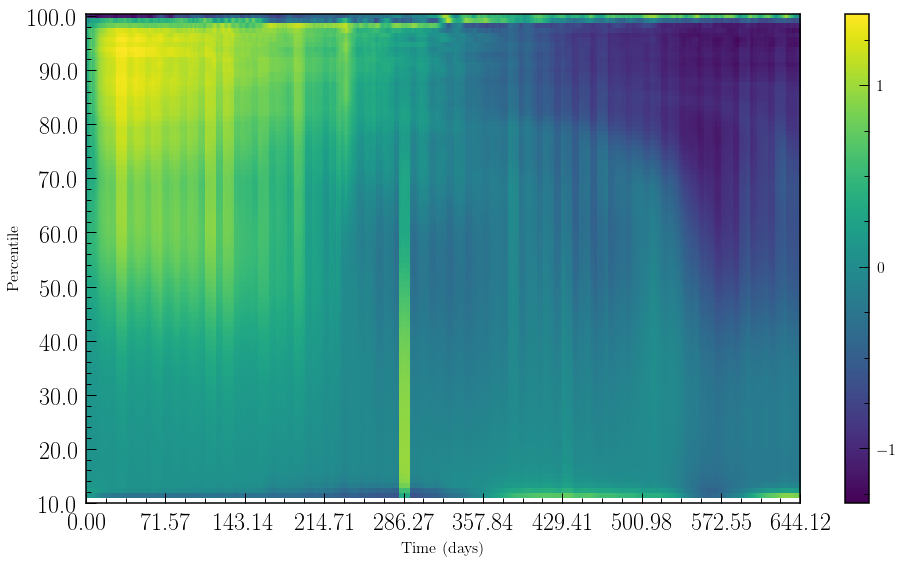

In [4]:
fig, ax = subplots(1,1, figsize=(16,9))
print lc[:,:,2][~np.isnan(lc[:,:,2])]
im = plotting.plot_pixel_lc(ax, lc[:,:,2], smooth=60, image=True, aspect='auto')
plotting.format_pixel_image(ax, im, lc.shape[0])


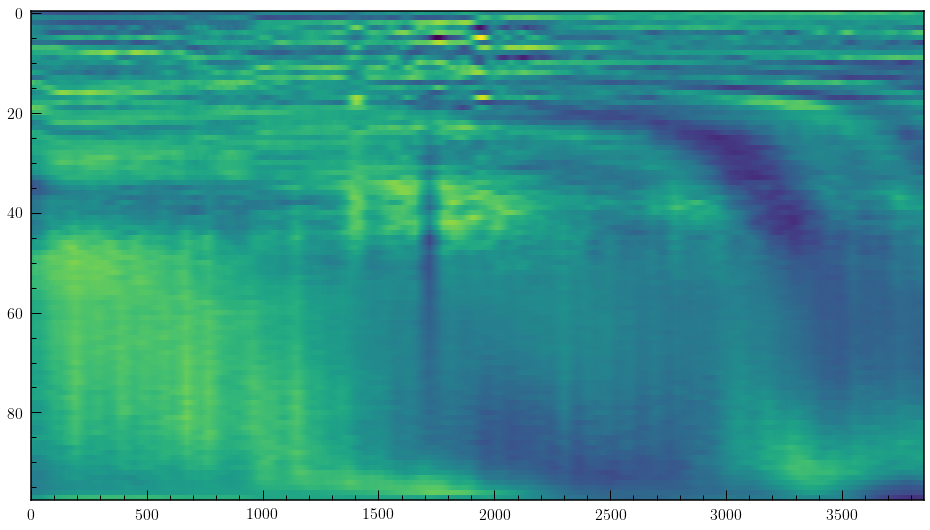

In [5]:
fig, ax = subplots(1,1, figsize=(16,9))
plotting.plot_pixel_lc(ax, lc[:,:,2], smooth=60, image=True, differenced=True, aspect='auto')

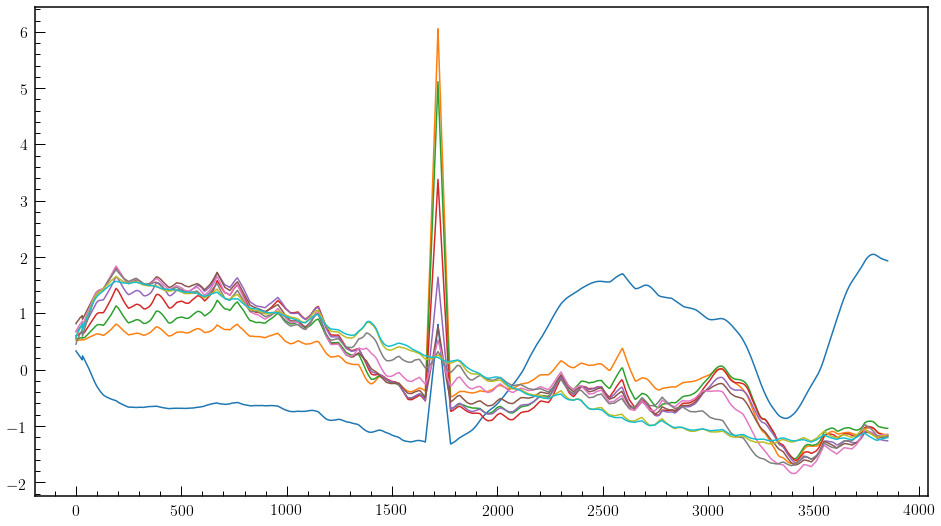

In [6]:
fig, ax = subplots(1,1, figsize=(16,9))
plotting.plot_pixel_lc(ax, lc[:,::10,2], smooth=60, image=False);

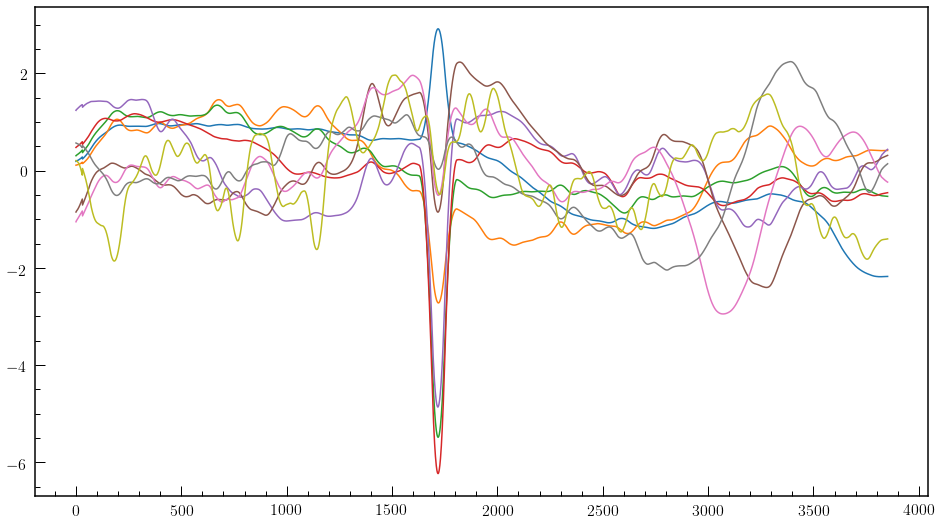

In [7]:
fig, ax = subplots(1,1, figsize=(16,9))
plotting.plot_pixel_lc(ax, lc[:,::10,2], smooth=60, image=False, differenced=True);